In [0]:
import matplotlib.pyplot as plot
import pandas as pd
import random
import statistics

In [5]:
#Read csv file and assign to a data frame
res_ins_df = pd.read_csv("restaurant_inspection_scores.csv")
res_ins_df.head()


,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
0,6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
1,6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
2,6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
3,6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
4,6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdbe7bec50>]],
      dtype=object)

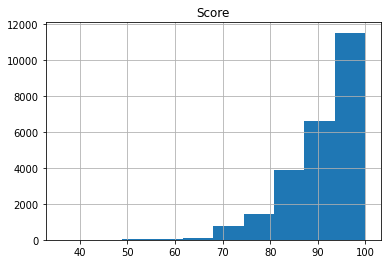

In [6]:
res_ins_df.hist('Score')

In [7]:
res_ins_mean = res_ins_df['Score'].mean()
print("Mean of scores of restaurant inspections:",res_ins_mean)

Mean of scores of restaurant inspections: 91.40706693478886


In [8]:
restaurant_sample = res_ins_df.sample(n=100,replace=False)
restaurant_sample.head()

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
14183,Mi Pueblito Market,78741,06/20/2016,77,"2030 E OLTORF ST\nAUSTIN, TX 78741\n(30.230232...",10214537,Routine Inspection
22090,Tyson's Tacos,78751,07/02/2015,72,"4905 AIRPORT BLVD\nAUSTIN, TX 78751\n(30.30965...",10933597,Routine Inspection
19919,Starbucks Coffee #13331,78758,05/19/2015,94,"11410 CENTURY OAKS TER Bunit 108\nAUSTIN, TX 7...",10009728,Routine Inspection
23092,"Verts Mediterranean Grill, Inc.",78723,09/14/2016,95,"1801 E 51ST ST\nAUSTIN, TX 78723\n(30.302589, ...",10985121,Routine Inspection
16603,Payless Food Store,78741,09/29/2014,83,"2400 BURLESON RD\nAUSTIN, TX 78741\n(30.229699...",10021664,Routine Inspection


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdbee5a1d0>]],
      dtype=object)

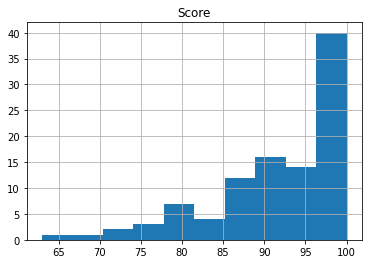

In [9]:
restaurant_sample.hist('Score')

In [10]:
sample_mean = restaurant_sample['Score'].mean()
print("Mean of 100 samples from restaurant inspections:",sample_mean )

Mean of 100 samples from restaurant inspections: 91.59


**1.1 Question 1**


Complete the function one_resampled_mean below. It should take in an original table data, with a column Score,
and return the mean score of one resampling from data.

In [0]:
def one_resampled_mean(data):
  one_resampled_data = data.sample(n=100,replace=False)
  one_resampled_data_mean = one_resampled_data['Score'].mean()
  return one_resampled_data_mean

In [12]:
mean = one_resampled_mean(res_ins_df)
print("Mean of random sample of row:",mean)

Mean of random sample of row: 91.67


**1.2 Question 2**

Complete the function bootstrap_scores below. It should take no arguments. It should simulate drawing 5000
resamples from restaurant_sample and compute the mean restaurant score in each resample. It should return an
array of those 5000 resample means.

In [13]:
def boostrap_scores():
  simulations = 5000
  means_of_simulations = []
  for i in range(simulations):
    rest_resample = restaurant_sample.sample(n=100,replace=True)
    rest_sample_mean = rest_resample['Score'].mean()
    means_of_simulations.append(rest_sample_mean)
  return means_of_simulations
resampled_means = boostrap_scores()
resampled_means

[91.24,
 91.16,
 90.96,
 92.87,
 91.81,
 91.09,
 92.34,
 89.97,
 92.35,
 91.44,
 90.73,
 91.09,
 91.28,
 90.7,
 90.9,
 90.16,
 92.45,
 90.78,
 93.2,
 90.42,
 92.36,
 90.96,
 91.12,
 90.8,
 90.5,
 91.75,
 92.41,
 92.45,
 91.26,
 91.67,
 91.54,
 91.3,
 90.71,
 91.51,
 91.48,
 92.24,
 91.41,
 92.49,
 92.25,
 90.18,
 91.8,
 92.15,
 92.52,
 93.36,
 91.9,
 92.88,
 91.71,
 93.18,
 92.77,
 91.14,
 92.14,
 92.21,
 90.89,
 91.04,
 91.53,
 93.28,
 92.59,
 92.44,
 91.5,
 92.15,
 91.65,
 92.02,
 92.37,
 90.22,
 90.14,
 93.01,
 92.41,
 92.82,
 93.09,
 91.79,
 91.95,
 91.95,
 91.87,
 91.86,
 91.59,
 91.86,
 90.24,
 92.55,
 92.53,
 92.38,
 91.52,
 92.94,
 90.85,
 93.78,
 91.72,
 90.55,
 92.74,
 91.75,
 92.04,
 89.98,
 92.17,
 91.1,
 91.81,
 91.47,
 91.65,
 91.27,
 92.04,
 91.24,
 91.64,
 92.03,
 92.7,
 91.13,
 90.93,
 90.43,
 91.87,
 92.73,
 92.12,
 90.38,
 91.92,
 91.9,
 93.02,
 92.13,
 90.44,
 91.7,
 90.7,
 91.05,
 92.35,
 90.59,
 92.24,
 91.33,
 92.56,
 91.03,
 92.75,
 91.8,
 92.0,
 90.88,
 94.66,


Text(0.5, 0, '\n Resampled means')

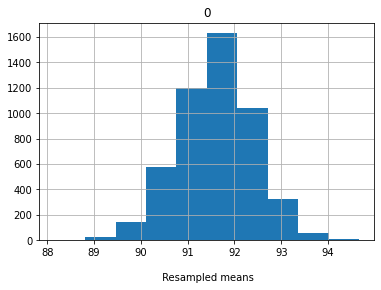

In [14]:
resample_means_df = pd.DataFrame(resampled_means)
resample_means_df.hist()
plot.xlabel("\n Resampled means")

**1.3 Question 3**

Compute a 95 percent confidence interval for the average restaurant score using the array resampled_means.

In [15]:
#Confidence Interval

import numpy as np
lower_bound = np.percentile(resampled_means,2.5)  
upper_bound = np.percentile(resampled_means,97.5)  
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 89.97 , 93.09 )


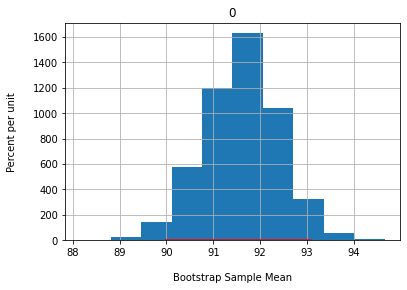

In [28]:
# Confidence Interval for bootstrap sample can be plotted on histogram from below piece of logic.

resample_means_df.hist()
plot.xlabel("\nBootstrap Sample Mean")
plot.ylabel("Percent per unit\n")
plot.plot((lower_bound,upper_bound), (0, 0), color='red')
plot.show()

**1.6 Question 6**

Without referencing the array resampled_means or performing any new simulations, calculate an interval around
the sample_mean that covers approximately 95% of the numbers in the resampled_means array. This confidence
interval should look very similar to the one you computed in Question 3.

In [19]:
sample_sd = statistics.stdev(restaurant_sample['Score'])
sample_size = restaurant_sample.shape[0]
print("Sample mean:",sample_mean)
print("\nSample Standard deviation:",sample_sd)
print("\nSample size:", sample_size)

lower_bound_normal = sample_mean - 2 * sample_sd / np.sqrt(sample_size)
upper_bound_normal = sample_mean + 2 * sample_sd / np.sqrt(sample_size)

print("\n95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

Sample mean: 91.59

Sample Standard deviation: 8.11793748996068

Sample size: 100

95% confidence interval for the average restaurant score, computed by a normal approximation:
( 89.96641250200787 , 93.21358749799214 )


**2.1 Question 1**


Define the function one_statistic_prop_heads which should return exactly one simulated statistic of the proportion
of heads from n coin 
flips.

In [0]:
import numpy as np
coin_proportions = [0.5,0.5]
def one_statistic_prop_heads(n):
  simulated_proportions = np.random.multinomial(n,coin_proportions) 
  prop_heads = simulated_proportions[0]
  return prop_heads

In [30]:
one_statistic_prop_heads(10)

3

**2.2 Question 2:**

Write a function called sample_size_n that takes in a sample size n. It should return an array that contains 5000
sample proportions of heads, each from n coin 
ips.

In [31]:
prop_of_heads = []
def sample_size_n(n):
  coin_proportions = [0.5,0.5]
  for i in range(5000):
    prop_of_heads.append(one_statistic_prop_heads(n))
  return prop_of_heads

sample_size_n(100)


[47,
 50,
 51,
 56,
 47,
 50,
 47,
 53,
 44,
 51,
 54,
 56,
 59,
 50,
 52,
 55,
 52,
 45,
 46,
 45,
 52,
 44,
 58,
 54,
 49,
 43,
 50,
 46,
 34,
 50,
 44,
 47,
 51,
 47,
 54,
 50,
 49,
 48,
 55,
 48,
 56,
 46,
 45,
 45,
 52,
 47,
 57,
 52,
 52,
 57,
 49,
 42,
 43,
 52,
 52,
 52,
 46,
 49,
 38,
 51,
 52,
 51,
 44,
 44,
 54,
 53,
 49,
 45,
 52,
 48,
 48,
 50,
 42,
 51,
 53,
 52,
 54,
 41,
 58,
 49,
 45,
 43,
 54,
 45,
 50,
 52,
 44,
 47,
 50,
 47,
 47,
 51,
 50,
 49,
 51,
 52,
 43,
 58,
 46,
 50,
 56,
 46,
 50,
 48,
 49,
 45,
 50,
 50,
 46,
 52,
 49,
 46,
 51,
 51,
 52,
 47,
 57,
 53,
 57,
 52,
 60,
 55,
 45,
 51,
 53,
 57,
 48,
 42,
 50,
 45,
 50,
 52,
 46,
 51,
 44,
 50,
 58,
 47,
 56,
 42,
 51,
 47,
 50,
 50,
 53,
 50,
 47,
 47,
 55,
 54,
 55,
 55,
 44,
 48,
 54,
 60,
 48,
 42,
 43,
 56,
 52,
 51,
 49,
 51,
 44,
 56,
 53,
 56,
 41,
 50,
 54,
 40,
 52,
 49,
 47,
 53,
 51,
 50,
 48,
 46,
 47,
 50,
 53,
 46,
 44,
 57,
 64,
 58,
 58,
 53,
 47,
 47,
 49,
 52,
 45,
 55,
 55,
 55,
 50,
 48,


**2.3 Question 3**

Write a function called empirical_sample_mean_sd that takes a sample size n as its argument. The function should
simulate 500 samples with replacement of size n from the 
flight delays dataset, and it should return the standard
deviation of the means of those 500 samples.

In [23]:
united_df = pd.read_csv("united_summer2015.csv")
united_df.head()

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64


In [24]:
def empirical_sample_mean(n):
  sample_means = []
  for i in range(500):
    sample = united_df.sample(n, replace = True)
    sample_means.append(sample['Delay'].mean())
  return statistics.stdev(sample_means)

empirical_sample_mean(10)

12.898918783043138

**2.4 Question 4**

Now, write a function called predict_sample_mean_sd to find the predicted value of the standard deviation of means
according to the relationship between the standard deviation of the sample mean and sample size that is discussed
in the textbook. It takes a sample size n (a number) as its argument. It returns the predicted value of the standard
deviation of the mean delay time for samples of size n from the 
ight delays (represented in the table united).

In [26]:
def predict_sample_mean_sd(n):
  std_value = statistics.stdev(united_df['Delay']) / n**0.5
  return std_value

predict_sample_mean_sd(10) 

12.485186952970288